   Overall_rank Country_or_region  Happiness_Score  GDP_per_capita  \
0             1           Finland            7.769           1.340   
1             2           Denmark            7.600           1.383   
2             3            Norway            7.554           1.488   
3             4           Iceland            7.494           1.380   
4             5       Netherlands            7.488           1.396   

   Social_support  Healthy_life_expectancy  Freedom_to_make_life_choices  \
0           1.587                    0.986                         0.596   
1           1.573                    0.996                         0.592   
2           1.582                    1.028                         0.603   
3           1.624                    1.026                         0.591   
4           1.522                    0.999                         0.557   

   Generosity  Perceptions_of_corruption  
0       0.153                      0.393  
1       0.252                      0

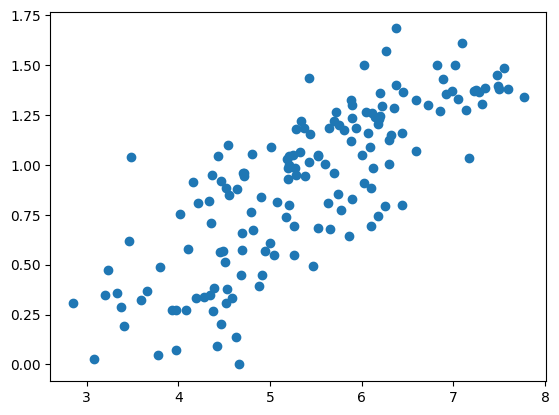

Pearson Correlation: 0.7938828678781276
P-Value: 4.3154809133194095e-35
                              Overall_rank  Happiness_Score  GDP_per_capita  \
Overall_rank                      1.000000        -0.989096       -0.801947   
Happiness_Score                  -0.989096         1.000000        0.793883   
GDP_per_capita                   -0.801947         0.793883        1.000000   
Social_support                   -0.767465         0.777058        0.754906   
Healthy_life_expectancy          -0.787411         0.779883        0.835462   
Freedom_to_make_life_choices     -0.546606         0.566742        0.379079   
Generosity                       -0.047993         0.075824       -0.079662   
Perceptions_of_corruption        -0.351959         0.385613        0.298920   

                              Social_support  Healthy_life_expectancy  \
Overall_rank                       -0.767465                -0.787411   
Happiness_Score                     0.777058                 0.779883 

/tmp/ipykernel_45864/3159015534.py:19: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  correlation, pvalue = scipy.stats.pearsonr(Happiness_Score, GDP_per_capita)


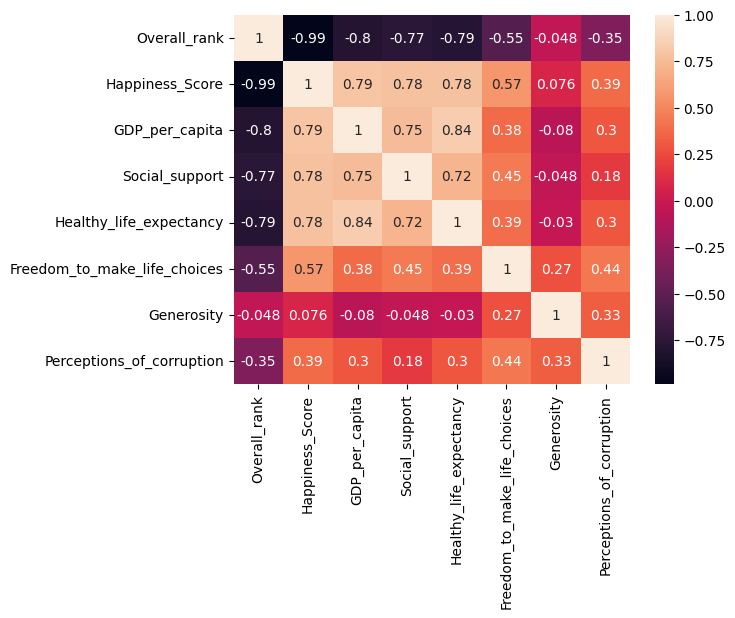

<Figure size 640x480 with 0 Axes>

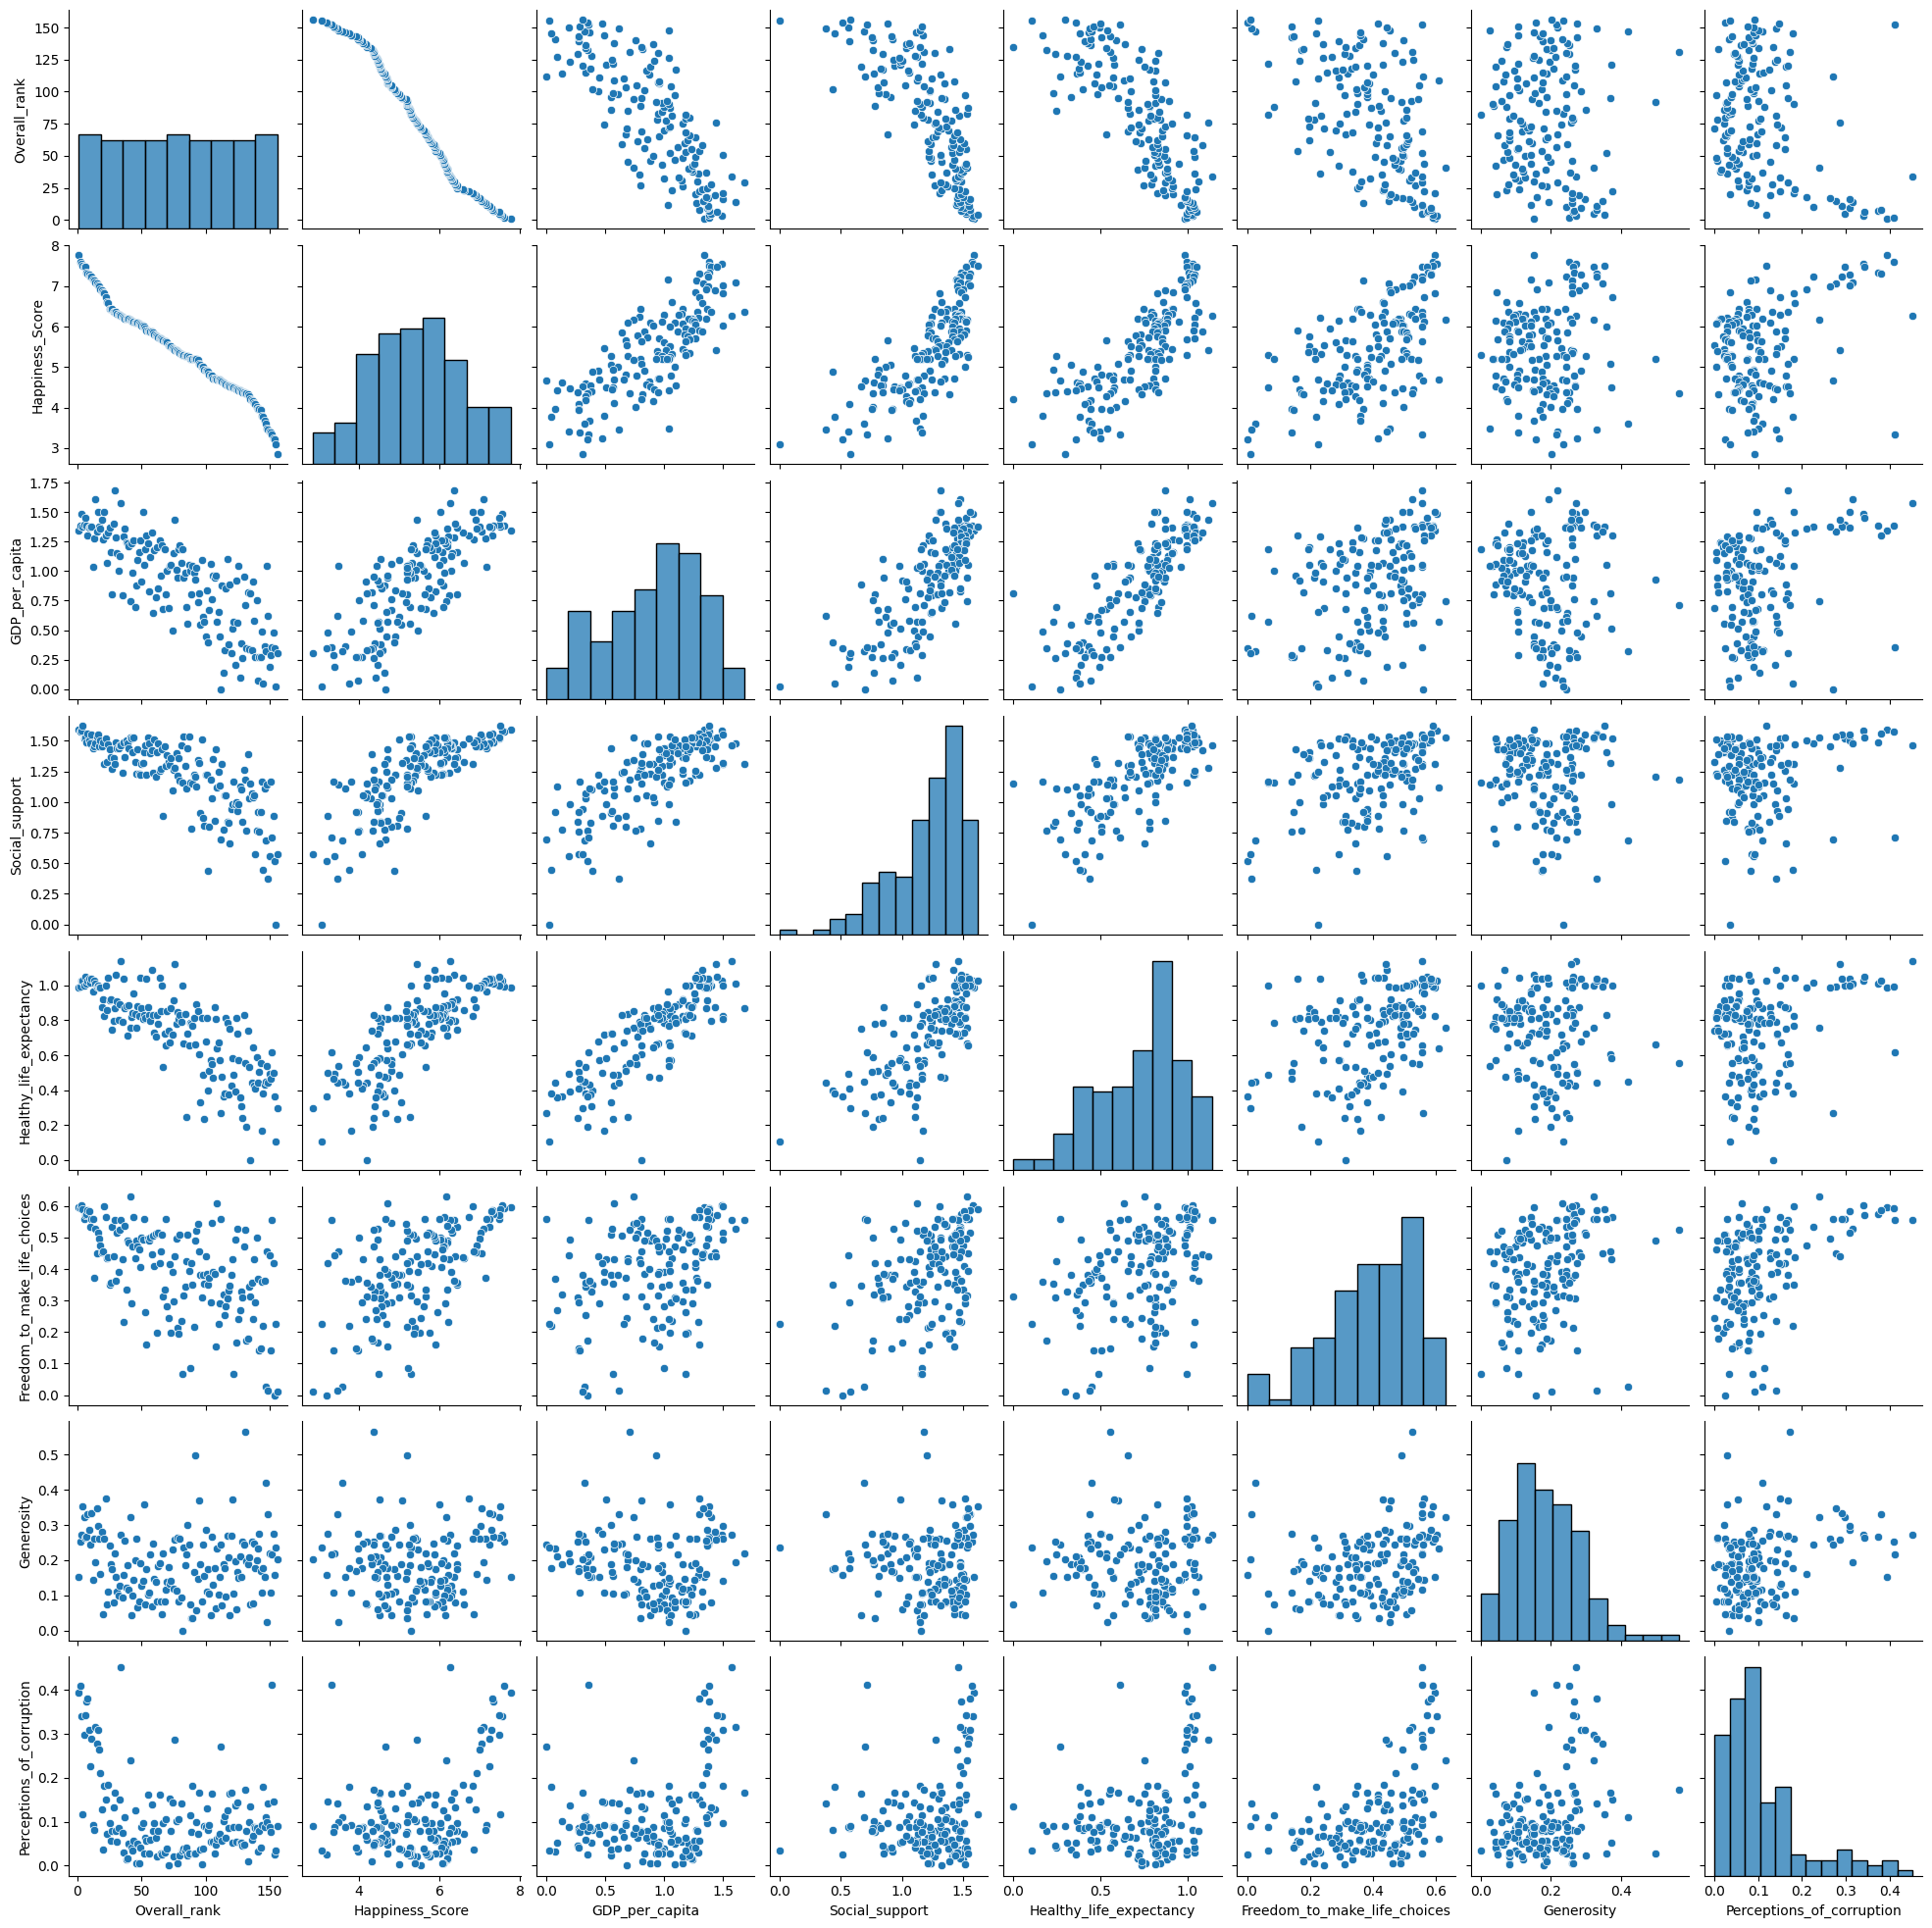

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scipy
import statsmodels.formula.api as sm
import seaborn as sn

WorldHappiness =pd.read_csv("https://raw.githubusercontent.com/TomdeFluiter/StudentsPerformance/main/World%20Happiness%202019.csv")
print(WorldHappiness.head())

Happiness_Score = WorldHappiness.Happiness_Score
GDP_per_capita = WorldHappiness.GDP_per_capita

plt.figure()
plt.scatter(Happiness_Score,GDP_per_capita)

plt.show()

scipy.pearsonr(Happiness_Score,GDP_per_capita)
correlation, pvalue = scipy.stats.pearsonr(Happiness_Score, GDP_per_capita)
print(f"Pearson Correlation: {correlation}")
print(f"P-Value: {pvalue}")

numeric_df = WorldHappiness.select_dtypes(include=["number"])
matrix = numeric_df.corr()
print(matrix)

plt.figure()
sn.heatmap(matrix, annot=True)

plt.figure()
sn.pairplot(numeric_df)

plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

model1 = sm.ols ('WorldHappiness["Happiness_Score"] ~ Overall_rank', data = WorldHappiness).fit()
print(model1.summary())
model2 = sm.ols ('WorldHappiness["Happiness_Score"] ~ GDP_per_capita', data = WorldHappiness).fit()
print(model2.summary())
model3 = sm.ols ('WorldHappiness["Happiness_Score"] ~ Generosity', data = WorldHappiness).fit()
print(model3.summary())

X = WorldHappiness[["Overall_rank","GDP_per_capita","Generosity"]].dropna()
X = add_constant(X)

VIF_data = pd.DataFrame()
VIF_data["variable"] = X.columns
VIF_data["VIF"] = [vif(X,i)
                   for i in range(len(X.columns))]
print(VIF_data)

model4 = sm.ols ('WorldHappiness["Happiness_Score"] ~ Overall_rank+GDP_per_capita+Generosity', data = WorldHappiness).fit()
print(model4.summary())
model5 = sm.ols ('WorldHappiness["Happiness_Score"] ~ Overall_rank+Generosity', data = WorldHappiness).fit()
print(model5.summary())

                                    OLS Regression Results                                   
Dep. Variable:     WorldHappiness["Happiness_Score"]   R-squared:                       0.978
Model:                                           OLS   Adj. R-squared:                  0.978
Method:                                Least Squares   F-statistic:                     6946.
Date:                               Thu, 19 Sep 2024   Prob (F-statistic):          5.04e-130
Time:                                       13:06:55   Log-Likelihood:                 61.244
No. Observations:                                156   AIC:                            -118.5
Df Residuals:                                    154   BIC:                            -112.4
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                   coef    std err          t      P>|t|    